In [135]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import sparse,  io, linalg
import pickle
from tqdm import tqdm_notebook as tqdm
import networkx as nx
import snap
from utils import *
import utils
#%load_ext autoreload
%autoreload 2

#import imp
#imp.reload(utils)

In [156]:
'''
G1=nx.read_adjlist('../oregon/oregon1_010331.txt',nodetype=int)
G2=nx.read_adjlist('../oregon/oregon1_010407.txt',nodetype=int)
G3=nx.read_adjlist('../oregon/oregon1_010414.txt',nodetype=int)
G4=nx.read_adjlist('../oregon/oregon1_010421.txt',nodetype=int)
G5=nx.read_adjlist('../oregon/oregon1_010428.txt',nodetype=int)
G6=nx.read_adjlist('../oregon/oregon1_010505.txt',nodetype=int)
G7=nx.read_adjlist('../oregon/oregon1_010512.txt',nodetype=int)
G = nx.Graph()
for G_temp in [G1, G2, G3, G4, G5, G6]:
    for e in tqdm(G_temp.edges_iter()):
        if G.has_edge(e[0],e[1]):
            G[e[0]][e[1]]['weight']+=1
        else:
            G.add_edge(e[0],e[1],weight=1)
            '''
#G1=nx.read_adjlist('../oregon/oregon1_010331.txt',nodetype=int)


G = read_all_graphs('../oregon/')

{'weight': 18,
 'weight_inv': 0.05555555555555555,
 'weight_inv_exp': 0.0024787521766663585}

<IPython.core.display.Javascript object>


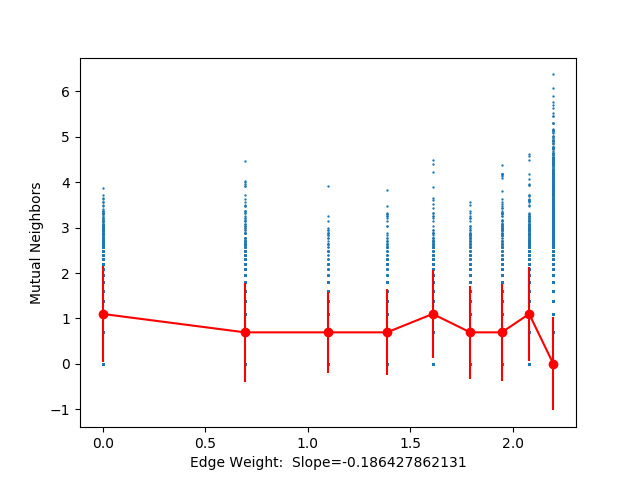

In [157]:
pwl=mutual(G)
plot_log_log_summary(pwl,"Edge Weight", "Mutual Neighbors", B=10,summary=np.median,discrete=True)

<IPython.core.display.Javascript object>


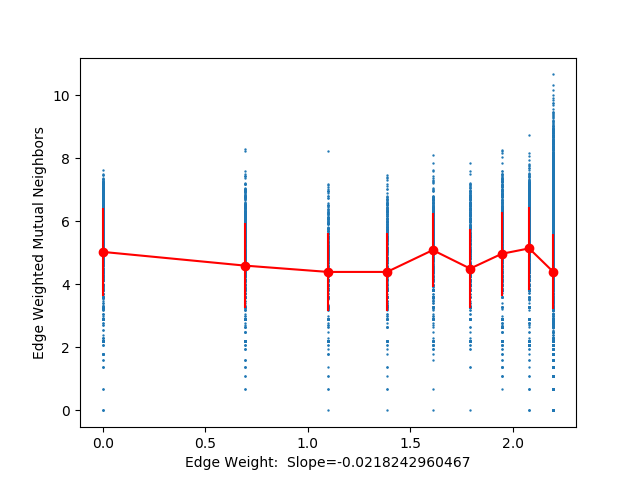

In [158]:
#pwl=sim_score_1(G)
pwl=mutual_ew(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Mutual Neighbors", B=10,summary=np.median,discrete=True)

<IPython.core.display.Javascript object>


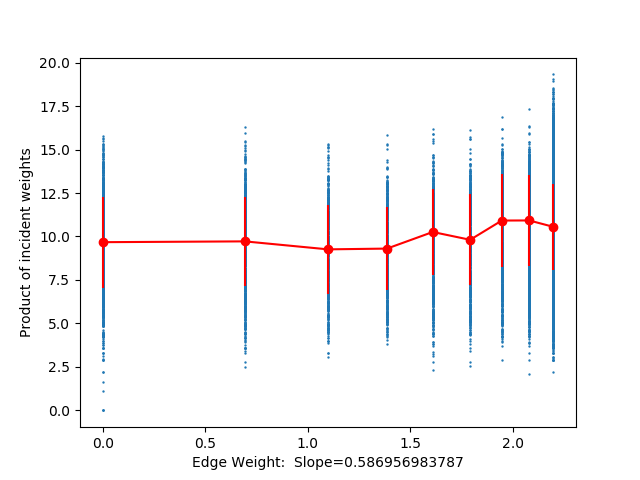

In [159]:
#pwl=sim_score_1(oregon_G)
pwl=ewpl(G)
plot_log_log_summary(pwl,"Edge Weight", "Product of incident weights", summary=np.median,B=10,discrete=True)

<IPython.core.display.Javascript object>


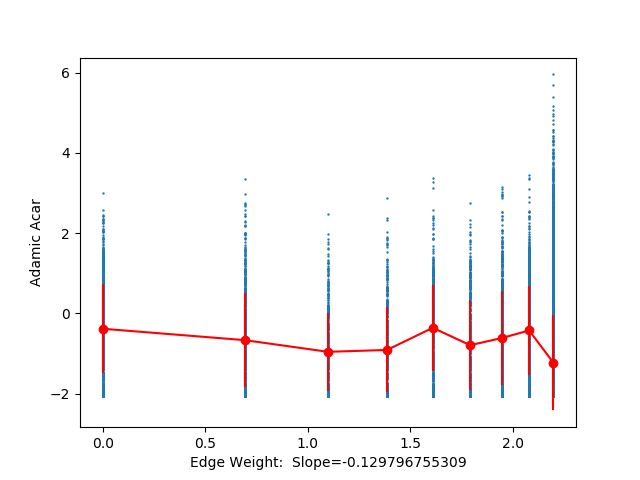

In [144]:
pwl=adamic_acar(G)
plot_log_log_summary(pwl,"Edge Weight", "Adamic Acar", B=10,summary=np.median,discrete=True)

<IPython.core.display.Javascript object>


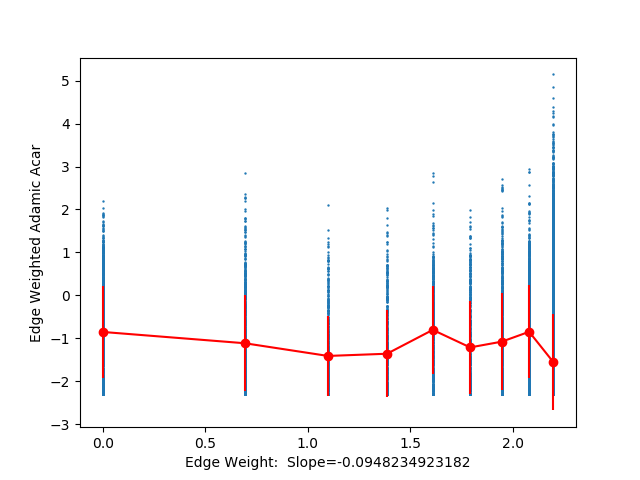

In [145]:
pwl=adamic_acar_ew(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Adamic Acar", B=10,summary=np.median,discrete=True)

<IPython.core.display.Javascript object>


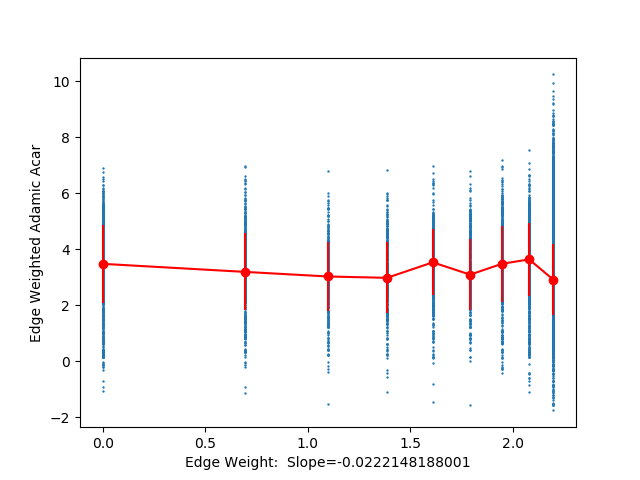

In [160]:
pwl=adamic_acar_ew_2(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Adamic Acar", B=10,summary=np.median,discrete=True)

<IPython.core.display.Javascript object>


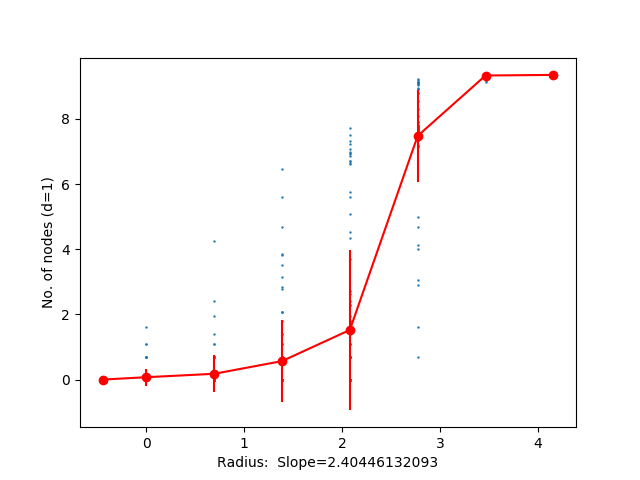

In [162]:
distances=[0.64,1.0,2.0,4.0,8.0,16.0,32.0,64.0]
pwl = self_similarity(G,distances,size=100)
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=1)",discrete=True,summary=np.mean)

<IPython.core.display.Javascript object>


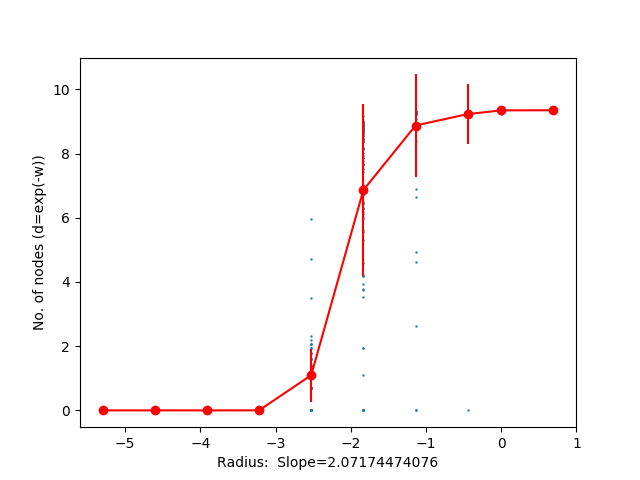

In [163]:
distances=[0.005,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.0,2.0]
pwl = self_similarity(G,distances,size=100,weight='weight_inv_exp')
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=exp(-w))",discrete=True,summary=np.mean)

In [49]:
distances=[0.02,0.04,0.08,0.16,0.32,0.64,1.0,2.0,4.0,8.0]
pwl = self_similarity(G,distances,size=100,weight='weight_inv')
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=1/w)",discrete=True,summary=np.mean)